In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # >= 0.9

import warnings
warnings.filterwarnings('ignore')

sns.set(style='ticks', context='talk', color_codes=True)

In [2]:
mpl.rcParams.update({
    'figure.figsize': [10, 6],
    'legend.fontsize': 18,
    'lines.linewidth' : 5,
    'patch.linewidth': 2.2,
    'hatch.linewidth': 2,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

In [3]:
UNIMODAL_PARAMS = np.loadtxt('results/unimodal_params.csv', delimiter=',')
BIMODAL_PARAMS = np.loadtxt('results/bimodal_params.csv', delimiter=',')

In [4]:
mu1, s1 = BIMODAL_PARAMS[0:2]
mu2, s2 = BIMODAL_PARAMS[2:4]
p1, p2 = BIMODAL_PARAMS[4], 1-BIMODAL_PARAMS[4]

print(mu1, s1, mu2, s2, p1, p2)

10999.685302388047 693.1018910253906 12312.438942308374 1777.6308318786093 0.6462641945797406 0.3537358054202594


In [21]:
((1/(2*s2**2)) - (1/(2*s1**2)))**-1

-1133027.364007664

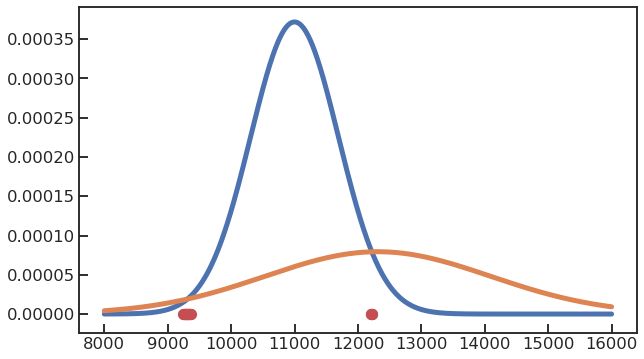

In [32]:
from scipy import stats

def bayes_decision_rule_bimodal(mu1, s1, mu2, s2, p1, p2):
    a = -0.5*(np.log(2*np.pi*s2**2) - np.log(2*np.pi*s1**2))
    b = np.log(p2) - np.log(p1)
    c = (mu2/(2*(s2**2))) - (mu1/(2*(s1**2)))
    d = (2 * s1**2 * s2**2) / (s1**2 - s2**2)
    
    print(a,b,c,d)
    
    return (a + b + c) * d
    

_x = np.linspace(8000, 16000, 1000)
plt.plot(_x, p1*stats.norm(mu1, s1).pdf(_x))
plt.plot(_x, p2*stats.norm(mu2, s2).pdf(_x))
plt.scatter(_x[np.argsort(np.abs(p1*stats.norm(mu1, s1).pdf(_x) - p2*stats.norm(mu2, s2).pdf(_x)))[0:20]], [0]*20, c='r')

array([ 9313.31331331,  9305.30530531, 12220.22022022,  9321.32132132,
        9297.2972973 ,  9329.32932933,  9289.28928929, 12212.21221221,
        9281.28128128,  9337.33733734,  9273.27327327,  9345.34534535,
       12228.22822823,  9265.26526527,  9353.35335335,  9257.25725726,
        9249.24924925,  9361.36136136, 12204.2042042 ,  9241.24124124])